### Data Loading & Exploration

#### Libraries 

In [123]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

import nltk
nltk.download("all", quiet=True)


import warnings
warnings.filterwarnings("ignore")   

#### Link data: https://www.gutenberg.org

#### Link data: https://www.gutenberg.org/files/43/43-h/43-h.htm

In [2]:
url = "https://www.gutenberg.org/files/43/43-h/43-h.htm"

In [3]:
req = requests.get(url)

In [4]:
type(req)

requests.models.Response

In [10]:
#html is in..
html = req.text

In [13]:
soup = BeautifulSoup(html, "html.parser")

In [14]:
type(soup)

bs4.BeautifulSoup

In [15]:
#get the titlte
soup.title

<title>The Project Gutenberg eBook of The Strange Case Of Dr. Jekyll And Mr. Hyde, by Robert Louis Stevenson</title>

In [22]:
soup.title.string

'The Project Gutenberg eBook of The Strange Case Of Dr. Jekyll And Mr. Hyde, by Robert Louis Stevenson'

In [24]:
# Find all the <a> tags in the HTML
links = soup.find_all('a')

# Iterate over the extracted links and print their text and href attributes
for link in links:
    print("Text:", link.text)
    print("Href:", link.get('href'))

Text: www.gutenberg.org
Href: https://www.gutenberg.org
Text: STORY OF THE DOOR
Href: #chap01
Text: SEARCH FOR MR. HYDE
Href: #chap02
Text: DR. JEKYLL WAS QUITE AT EASE
Href: #chap03
Text: THE CAREW MURDER CASE
Href: #chap04
Text: INCIDENT OF THE LETTER
Href: #chap05
Text: INCIDENT OF DR. LANYON
Href: #chap06
Text: INCIDENT AT THE WINDOW
Href: #chap07
Text: THE LAST NIGHT
Href: #chap08
Text: DR. LANYON’S NARRATIVE
Href: #chap09
Text: HENRY JEKYLL’S FULL STATEMENT OF THE CASE
Href: #chap10
Text: 
Href: None
Text: 
Href: None
Text: 
Href: None
Text: 
Href: None
Text: 
Href: None
Text: 
Href: None
Text: 
Href: None
Text: 
Href: None
Text: 
Href: None
Text: 
Href: None
Text: www.gutenberg.org
Href: https://www.gutenberg.org
Text: www.gutenberg.org/donate
Href: https://www.gutenberg.org/donate/
Text: www.gutenberg.org
Href: https://www.gutenberg.org


In [25]:
text = soup.get_text()

In [27]:
print(text)






The Project Gutenberg eBook of The Strange Case Of Dr. Jekyll And Mr. Hyde, by Robert Louis Stevenson




The Project Gutenberg eBook of The Strange Case Of Dr. Jekyll And Mr. Hyde, by Robert Louis Stevenson

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online
at www.gutenberg.org. If you
are not located in the United States, you will have to check the laws of the
country where you are located before using this eBook.

Title: The Strange Case Of Dr. Jekyll And Mr. Hyde
Author: Robert Louis Stevenson
Release Date: October 31, 1992 [eBook #43]
[Most recently updated: May 22, 2023]
Language: English
Character set encoding: UTF-8
Produced by: David Widger
*** START OF THE PROJECT GUTENBERG EBOOK THE STRANGE CASE OF DR. JEKYLL AND MR. HYDE ***




The Strange 

### NLTK to Examine Text 

In [28]:
tokenizer = nltk.tokenize.RegexpTokenizer("\w+")

In [29]:
tokens = tokenizer.tokenize(text)

In [33]:
tokens[0:16]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'The',
 'Strange',
 'Case',
 'Of',
 'Dr',
 'Jekyll',
 'And',
 'Mr',
 'Hyde',
 'by',
 'Robert']

In [34]:
len(tokens)

29192

In [36]:
### for loops
words = []

In [38]:
for word in tokens:
    words.append(word.lower())

In [39]:
words[0:16]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'strange',
 'case',
 'of',
 'dr',
 'jekyll',
 'and',
 'mr',
 'hyde',
 'by',
 'robert']

In [40]:
sw = nltk.corpus.stopwords.words("english")

In [41]:
type(sw)

list

In [44]:
sw[:9]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you']

In [43]:
len(sw)

179

In [45]:
words2 = []

In [46]:
for word in words:
    if word not in sw:
        words2.append(word)

In [47]:
words2[:7]

['project', 'gutenberg', 'ebook', 'strange', 'case', 'dr', 'jekyll']

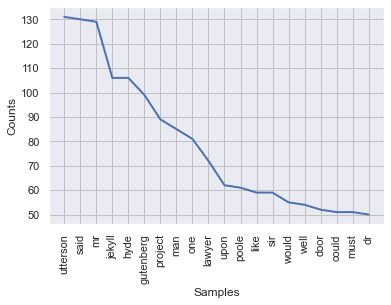

<Axes: xlabel='Samples', ylabel='Counts'>

In [48]:
sns.set(color_codes=True)
freqDist = nltk.FreqDist(words2)
freqDist.plot(20)

### For Loop Creation of 8.2

In [49]:
def plot_words(url):
    req = requests.get(url)
    html = req.text
    soup = BeautifulSoup(html, "html.parser")
    text = soup.get_text()
    tokenizer = nltk.tokenize.RegexpTokenizer("\w+")
    tokens = tokenizer.tokenize(text)
    words = []
    for word in tokens:
        words.append(word.lower())
    sw =  nltk.corpus.stopwords.words("english")
    words2 = []
    for word in words:
        if word not in sw:
            words2.append(word)
    freqDist = nltk.FreqDist(words2)
    freqDist.plot(20)

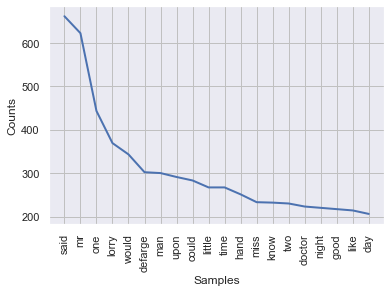

In [50]:
#book: a Tale of two cities
plot_words("https://www.gutenberg.org/files/98/98-h/98-h.htm")

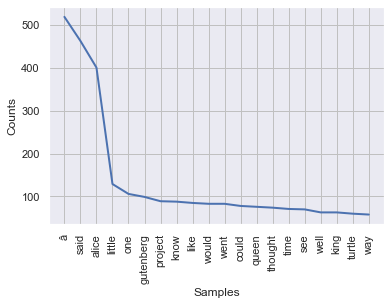

In [51]:
#book: Alice in Wonderland
plot_words("https://www.gutenberg.org/files/11/11-h/11-h.htm")

### Movie Reviews Text Analysis & Frequency

In [54]:
import random

In [55]:
documents = [(list(nltk.corpus.movie_reviews.words(fileid)), category)
            	for category in nltk.corpus.movie_reviews.categories()
            	for fileid in nltk.corpus.movie_reviews.fileids(category)]

In [56]:
random.shuffle(documents)

In [58]:
print(documents[0])

(['don', "'", 't', 'get', 'me', 'wrong', '--', 'i', 'tend', 'to', 'appreciate', 'besson', "'", 's', 'naive', ',', 'unashamedly', 'romantic', 'worldview', ',', 'an', 'artsy', 'european', 'sensibility', 'gone', 'thoroughly', 'hollywood', '.', 'his', '1994', 'leon', 'is', 'exciting', 'and', 'absurdly', 'moving', ',', 'thanks', 'mainly', 'to', 'the', 'interplay', 'between', 'jean', 'reno', 'and', 'a', 'young', 'natalie', 'portman', ',', 'and', '1997', "'", 's', 'the', 'fifth', 'element', 'is', 'a', 'goofy', 'paean', 'to', 'love', ',', 'l', '-', 'u', '-', 'v', ',', 'that', "'", 's', 'even', 'more', 'of', 'a', 'hoot', 'on', 'repeated', 'viewings', '.', 'but', 'his', 'joan', 'of', 'arc', 'is', 'a', 'mess', ',', 'despite', 'some', 'stirring', 'battle', 'scenes', 'and', 'the', 'mostly', 'knockout', 'presence', 'of', 'a', 'close', '-', 'cropped', 'milla', 'jovovich', 'as', 'the', 'maiden', 'herself', '.', 'jovovich', ',', 'besson', "'", 's', 'own', 'personal', 'muse', 'through', 'the', 'making',

In [59]:
all_words = []

In [60]:
for w in nltk.corpus.movie_reviews.words():
    all_words.append(w.lower())

In [61]:
#freq distribution
all_words = nltk.FreqDist(all_words)

In [63]:
all_words

FreqDist({',': 77717, 'the': 76529, '.': 65876, 'a': 38106, 'and': 35576, 'of': 34123, 'to': 31937, "'": 30585, 'is': 25195, 'in': 21822, ...})

In [64]:
#most common words
print(all_words.most_common(10))

[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822)]


In [65]:
# search of individual...
print(all_words["bad"])

1395


In [67]:
print(all_words["good"])

2411


### Finding Features of Textual Data 

In [69]:
word_feats = list(all_words.keys())[:2500]

In [74]:
def find_feats(document):
    words = set(document)
    feats = {}
    for w in word_feats:
        feats[w] = (w in words)
        
    return feats

In [75]:
#build the set of features
feat_set = [(find_feats(rev), category) for (rev, category) in documents]

In [76]:
type(feat_set)

list

In [79]:
len(feat_set)

2000

### Naive Bayes with NLTK

In [80]:
0.75 *2000

1500.0

In [81]:
trainer = feat_set[:1500]

tester = feat_set[1500:]

In [82]:
#classifier 
classifier = nltk.NaiveBayesClassifier.train(trainer)

In [83]:
#accuracy
print("Accuracy of Classifier Percentage:", (nltk.classify.accuracy(classifier, tester))*100)

Accuracy of Classifier Percentage: 79.60000000000001


In [84]:
#most informative features
classifier.show_most_informative_features(20)

Most Informative Features
               atrocious = True              neg : pos    =      9.2 : 1.0
              uninspired = True              neg : pos    =      8.4 : 1.0
                  regard = True              pos : neg    =      8.1 : 1.0
                 annoyed = True              neg : pos    =      7.9 : 1.0
                 frances = True              pos : neg    =      7.5 : 1.0
                 martian = True              neg : pos    =      7.2 : 1.0
                     ugh = True              neg : pos    =      7.2 : 1.0
                 miscast = True              neg : pos    =      6.8 : 1.0
              schumacher = True              neg : pos    =      6.8 : 1.0
                  turkey = True              neg : pos    =      6.6 : 1.0
                   awful = True              neg : pos    =      6.5 : 1.0
           unimaginative = True              neg : pos    =      6.5 : 1.0
                  wasted = True              neg : pos    =      6.4 : 1.0

### Cosine Similarity Between Texts

In [85]:
#Jekyll Hyde 
url1 = "https://www.gutenberg.org/files/43/43-h/43-h.htm"

#Treasure Island
url2 = "https://www.gutenberg.org/files/120/120-h/120-h.htm"

#Dracula
url3 = "https://www.gutenberg.org/files/345/345-h/345-h.htm"

#Two Cities
url4 = "https://www.gutenberg.org/files/98/98-h/98-h.htm"

In [98]:
import string 

lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [99]:
def clean_word_list(url):
    req = requests.get(url)
    html = req.text
    soup = BeautifulSoup(html, "html.parser")
    text = soup.get_text()
    tokenizer = LemNormalize
    tokens = tokenizer(text)
    words = []
    for word in tokens:
        words.append(word)
    return words

In [100]:
#Jekyll Hyde 
clean1 = clean_word_list(url1)

#Treasure Island
clean2 = clean_word_list(url2)

#Dracula
clean3 = clean_word_list(url3)

#Two Cities
clean4 = clean_word_list(url4)

In [101]:
type(clean1)

list

In [102]:
clean1[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'strange',
 'case',
 'of',
 'dr']

In [103]:
#list to string 
def list_to_string(orig_list, seperator=' '):
    return seperator.join(orig_list)

In [104]:
#Jekyll Hyde 
string1 = list_to_string(clean1)

#Treasure Island
string2 = list_to_string(clean2)

#Dracula
string3 = list_to_string(clean3)

#Two Cities
string4 = list_to_string(clean4)

In [105]:
type(string1)

str

In [106]:
string1[:10]

'the projec'

In [112]:
#doc lib or list of strings
doc_lib = [string1, string2, string3, string4]

#### TfidfVectorizer

In [113]:
#feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

In [117]:
TfidfVec = TfidfVectorizer(tokenizer = LemNormalize, stop_words="english")

In [118]:
 def   cos_similarity(textlist):
        tfidf = TfidfVec.fit_transform(textlist)
        return ( tfidf * tfidf.T).toarray()

In [119]:
stored = cos_similarity(doc_lib)

In [120]:
stored

array([[1.        , 0.78833537, 0.48724925, 0.82890023],
       [0.78833537, 1.        , 0.40862562, 0.84296923],
       [0.48724925, 0.40862562, 1.        , 0.40422792],
       [0.82890023, 0.84296923, 0.40422792, 1.        ]])

In [ ]:
#Jekyll Hyde 


#Treasure Island


#Dracula


#Two Cities


In [121]:
names = ["Jekill","Treasure","Dracula","Two Cities"]

In [124]:
visual = pd.DataFrame(stored, index = names, columns = names)

In [125]:
print("Cosine Similarity Matrix")
visual

Cosine Similarity Matrix


,Jekill,Treasure,Dracula,Two Cities
Jekill,1.000000,0.788335,0.487249,0.828900
Treasure,0.788335,1.000000,0.408626,0.842969
Dracula,0.487249,0.408626,1.000000,0.404228
Two Cities,0.828900,0.842969,0.404228,1.000000
